<a href="https://colab.research.google.com/github/MusaibSyd/Transfer-Learning/blob/main/Transfer_Learning_EfficientNETB0_Food_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import os

In [2]:
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

In [3]:
for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/c

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train/"
test_dir  = "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

print ("Training Images:")

train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                                          target_size=IMAGE_SHAPE,
                                                          batch_size=BATCH_SIZE,
                                                          class_mode="categorical")

print ("Test Images:")

test_data_10_percent = test_datagen.flow_from_directory(test_dir,
                                                          target_size=IMAGE_SHAPE,
                                                          batch_size=BATCH_SIZE,
                                                          class_mode="categorical")

Training Images:
Found 750 images belonging to 10 classes.
Test Images:
Found 2500 images belonging to 10 classes.


In [5]:
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [6]:
import tensorflow as tf
import tensorflow_hub as hub 
from tensorflow.keras import layers

In [7]:
def create_model (model_url, num_classes=10):
  #Download the pretrained model and asave it as a keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,
                                           name="feature_extraction_layer",
                                           input_shape=(224,224,3))
  #Create our model

  model = tf.keras.Sequential([
      feature_extractor_layer,
      layers.Dense(num_classes, activation='Softmax', name='output_layer')
  ])
  return model
  

In [8]:
#creating and testing ResNet Model

efficientnet_model = create_model(efficientnet_url)

In [11]:
efficientnet_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             4049564   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


In [12]:
efficientnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

In [14]:
efficientnet_history = efficientnet_model.fit(train_data_10_percent,
                 epochs=5,
                 validation_data=test_data_10_percent)

Epoch 1/5
24/24 [==============================] - 17s 710ms/step - loss: 1.8095 - accuracy: 0.4600 - val_loss: 1.2673 - val_accuracy: 0.7560
Epoch 2/5
24/24 [==============================] - 15s 649ms/step - loss: 1.0429 - accuracy: 0.7853 - val_loss: 0.8494 - val_accuracy: 0.8284
Epoch 3/5
24/24 [==============================] - 16s 681ms/step - loss: 0.7491 - accuracy: 0.8480 - val_loss: 0.6867 - val_accuracy: 0.8480
Epoch 4/5
24/24 [==============================] - 17s 710ms/step - loss: 0.6058 - accuracy: 0.8693 - val_loss: 0.6021 - val_accuracy: 0.8600
Epoch 5/5
24/24 [==============================] - 24s 1s/step - loss: 0.5173 - accuracy: 0.8880 - val_loss: 0.5516 - val_accuracy: 0.8652


In [15]:
import matplotlib.pyplot as plt


In [27]:
def plot_loss_curves(history):
  
  loss = history.history['loss']
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss

  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  #accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

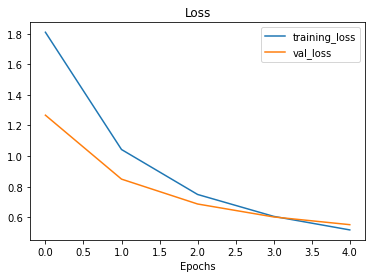

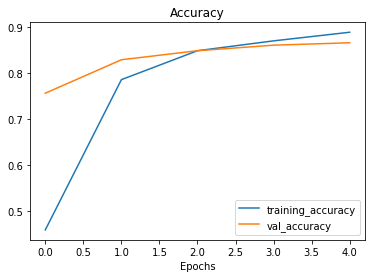

In [28]:
plot_loss_curves(efficientnet_history)

In [22]:
import pandas as pd
losses = pd.DataFrame(efficientnet_model.history.history)

In [24]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.809525,0.460000,1.267303,0.7560
1,1.042918,0.785333,0.849373,0.8284
2,0.749079,0.848000,0.686727,0.8480
3,0.605839,0.869333,0.602110,0.8600
4,0.517310,0.888000,0.551605,0.8652
